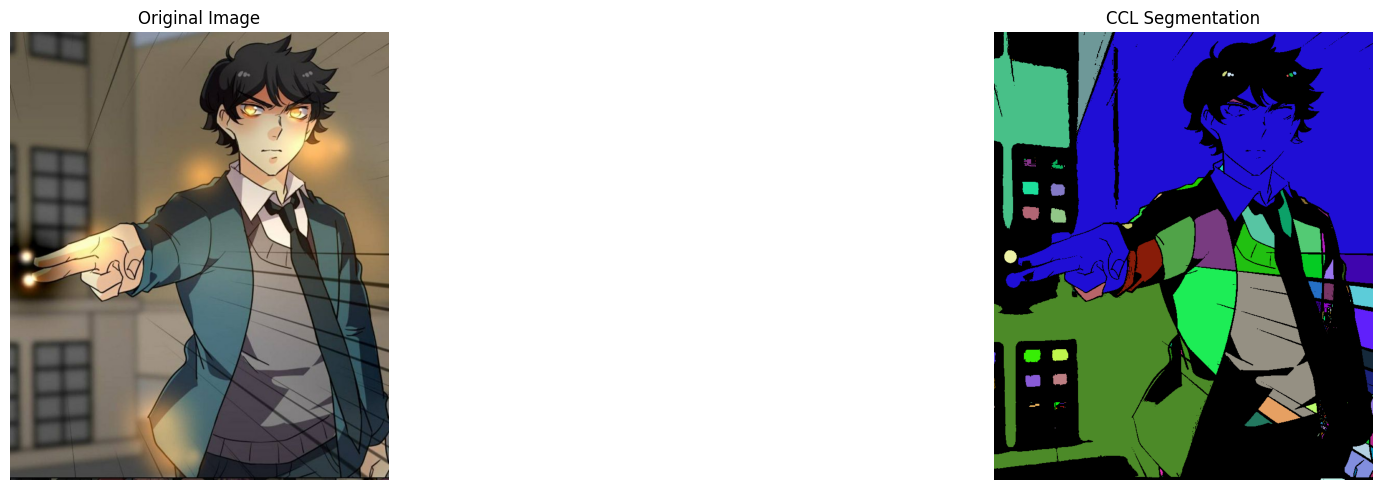

In [16]:
import requests
from PIL import Image
from io import BytesIO
import cv2
import numpy as np
from skimage import color, segmentation
import matplotlib.pyplot as plt

# Load the image from a URL (replace 'image_url' with your image URL)
image_url = 'https://i.pinimg.com/736x/4b/a7/9a/4ba79a7f46272ab47b27b1addd913b3f.jpg'

try:
    # Fetch the image using requests and convert it to a format that OpenCV can handle
    response = requests.get(image_url)
    if response.status_code == 200:
        img_data = BytesIO(response.content)
        image = np.array(Image.open(img_data))

        # Function to perform CCL-based image segmentation
        def ccl_segmentation(image):
            # Convert the image to grayscale
            gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

            # Apply thresholding to create a binary image
            _, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

            # Find connected components
            num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_image, connectivity=8)

            # Generate random colors for each label
            colors = np.random.randint(0, 255, size=(num_labels, 3), dtype=np.uint8)

            # Create a colored segmented image
            segmented_image = np.zeros_like(image)
            for label in range(1, num_labels):
                segmented_image[labels == label] = colors[label]

            return segmented_image

        # Perform CCL-based image segmentation
        segmented_image = ccl_segmentation(image)

        # Display the original image, feature detection result, and segmentation result
        plt.figure(figsize=(15, 5))

        plt.subplot(131)
        plt.title('Original Image')
        plt.imshow(image)
        plt.axis('off')

        plt.subplot(133)
        plt.title('CCL Segmentation')
        plt.imshow(segmented_image)
        plt.axis('off')

        plt.tight_layout()
        plt.show()
    else:
        print(f"Failed to retrieve the image. Status code: {response.status_code}")
except Exception as e:
    print(f"An error occurred: {str(e)}")